In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]

In [6]:
train_sj = pd.read_csv('train_sj.csv')
test_sj = pd.read_csv('test_sj.csv')
train_iq = pd.read_csv('train_iq.csv')
test_iq = pd.read_csv('test_iq.csv')
X = pd.read_csv('dengue_features_train.csv')
y = pd.read_csv('dengue_labels_train.csv')
X_test = pd.read_csv('dengue_features_test.csv')


Text(0.5, 1, 'San Juan Variable Correlations')

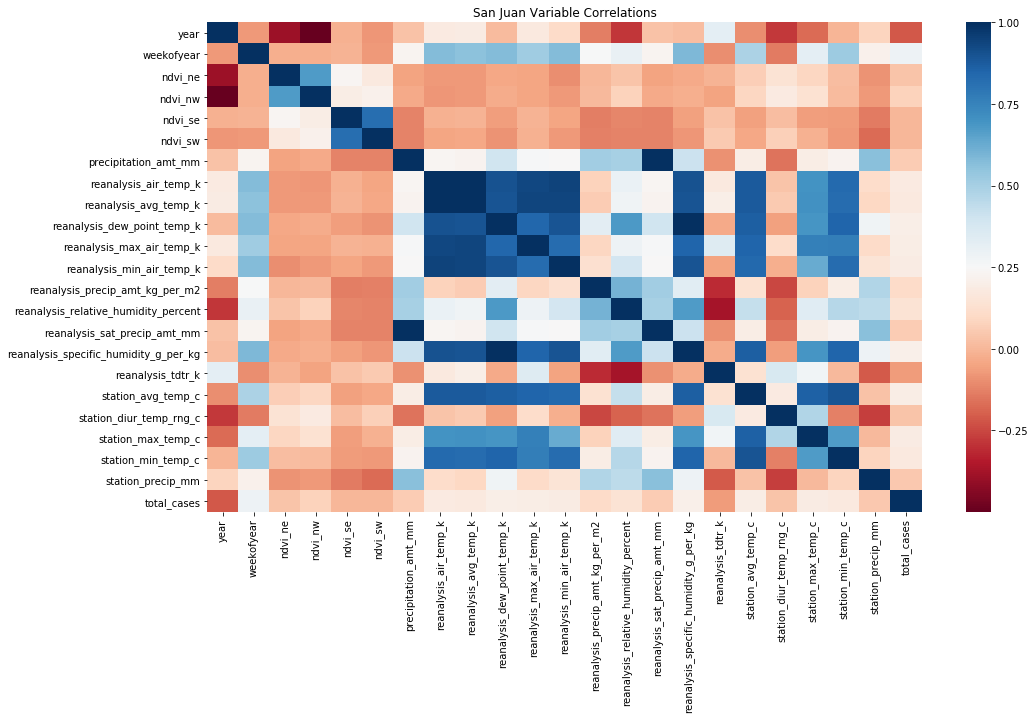

In [7]:
X_sj = X.loc[X['city'] =='sj'].copy()
y_sj = y.loc[y['city'] =='sj'].copy()

X_iq = X.loc[X['city'] =='iq'].copy()
y_iq = y.loc[y['city'] =='iq'].copy()

X_sj_test = X_test.loc[X_test['city'] == 'sj'].copy()
X_iq_test = X_test.loc[X_test['city'] == 'iq'].copy()

X_sj.drop(labels=['city', 'week_start_date'], axis=1,inplace=True)
X_iq.drop(labels=['city', 'week_start_date'], axis=1,inplace=True)
X_sj_test.drop(labels=['city', 'week_start_date'], axis=1,inplace=True)
X_iq_test.drop(labels=['city', 'week_start_date'], axis=1,inplace=True)
X_sj['total_cases'] = y_sj.total_cases
X_iq['total_cases'] = y_iq.total_cases
sns.heatmap(X_sj.corr(), cmap='RdBu')
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'San Juan Variables Correlation with target variable (total_cases)')

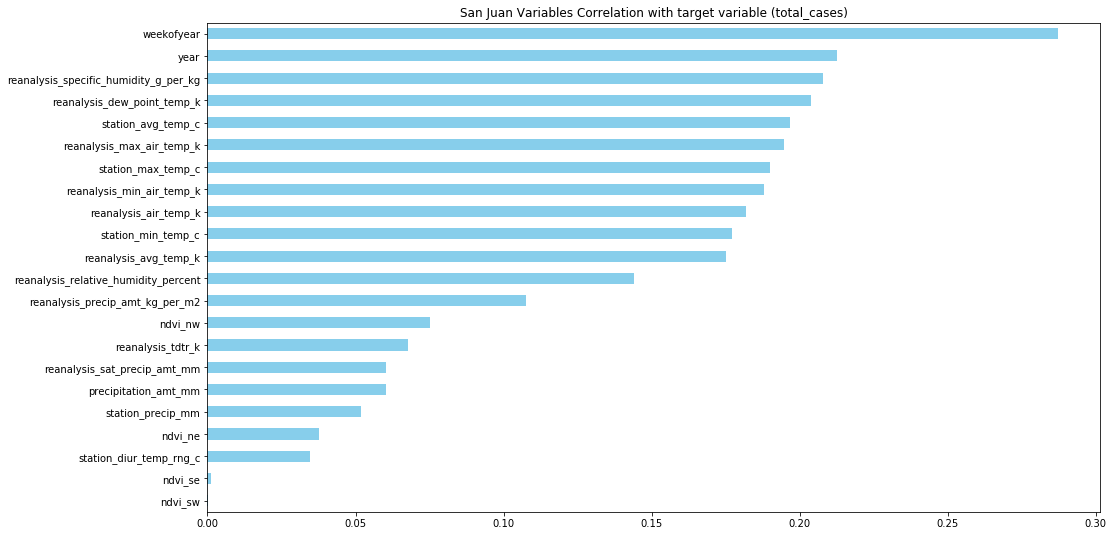

In [8]:
X_sj.corr().abs().total_cases.drop('total_cases').sort_values().plot.barh(color='skyblue')
plt.title('San Juan Variables Correlation with target variable (total_cases)')

Text(0.5, 1, 'Iquitos Variable Correlations')

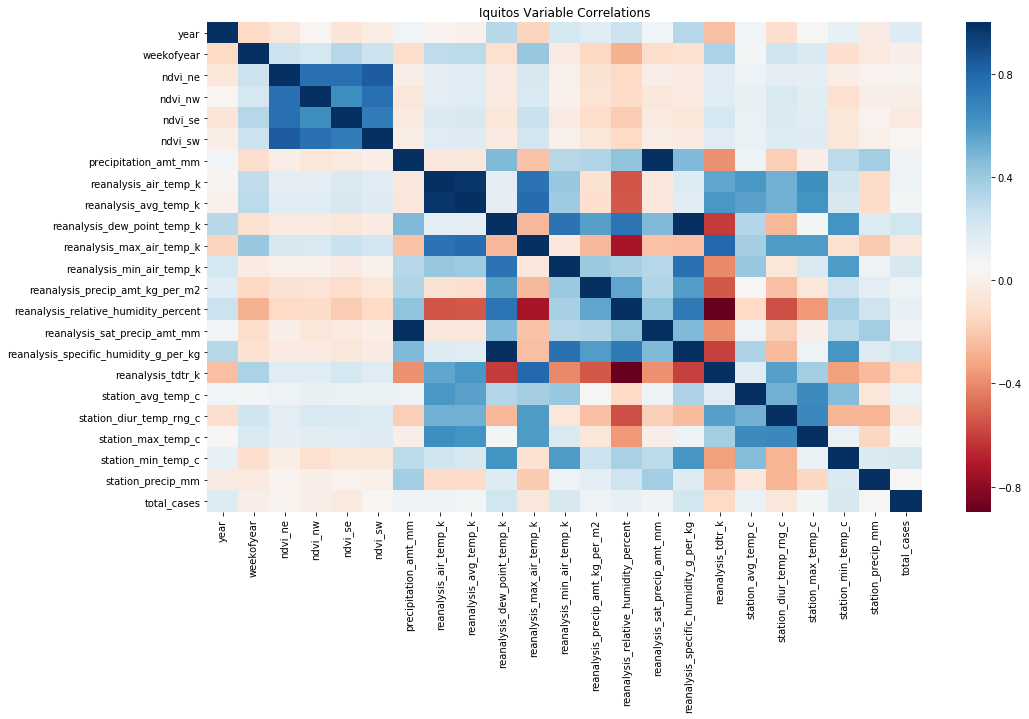

In [10]:
sns.heatmap(X_iq.corr(), cmap='RdBu')
plt.title('Iquitos Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variables Correlation with target variable (total_cases)')

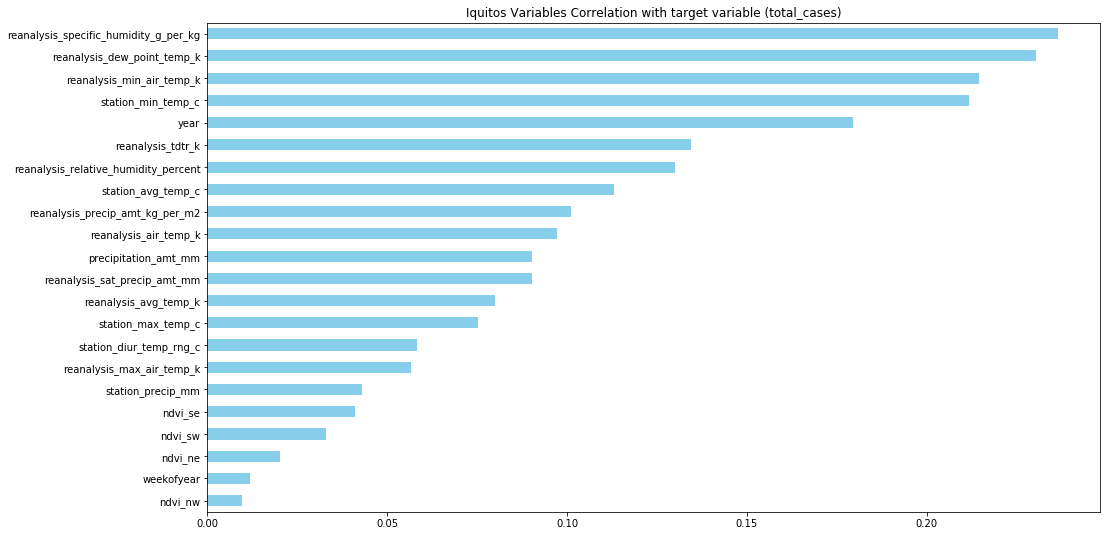

In [11]:
X_iq.corr().abs().total_cases.drop('total_cases').sort_values().plot.barh(color='skyblue')
plt.title('Iquitos Variables Correlation with target variable (total_cases)')

In [12]:
X_train = train_sj.drop(labels=['total_cases'], axis=1)
y_train = train_sj['total_cases']
X_test = test_sj.drop(labels=['total_cases'], axis=1)
y_test = test_sj['total_cases']

In [13]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
scores = ["explained_variance" , "neg_mean_absolute_error" ,"neg_mean_squared_error" ,"r2"]
model = MLPRegressor(max_iter=10000)
parameters = {'hidden_layer_sizes': [(100, ), (20, 30), (13, 13, 13)]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, parameters, cv=TimeSeriesSplit(n_splits=5),
             scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        print()
    
    y_true, y_pred = y_test, clf.predict(X_test).astype(int)
    
    
    print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))
    print("-------------------------------------------------------")
    print()

# Tuning hyper-parameters for explained_variance

Best parameters set found on development set:

{'hidden_layer_sizes': (20, 30)}

Grid scores on development set:

-0.548 (+/-1.781) for {'hidden_layer_sizes': (100,)}

-0.431 (+/-1.695) for {'hidden_layer_sizes': (20, 30)}

-0.812 (+/-3.456) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 23.680851
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'hidden_layer_sizes': (13, 13, 13)}

Grid scores on development set:

-49.600 (+/-63.968) for {'hidden_layer_sizes': (100,)}

-47.083 (+/-38.566) for {'hidden_layer_sizes': (20, 30)}

-40.018 (+/-35.551) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 22.930851
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'hidden_layer_sizes': (13, 13

In [15]:

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 24.271277


Text(0.5, 1.0, 'San Juan Prediction')

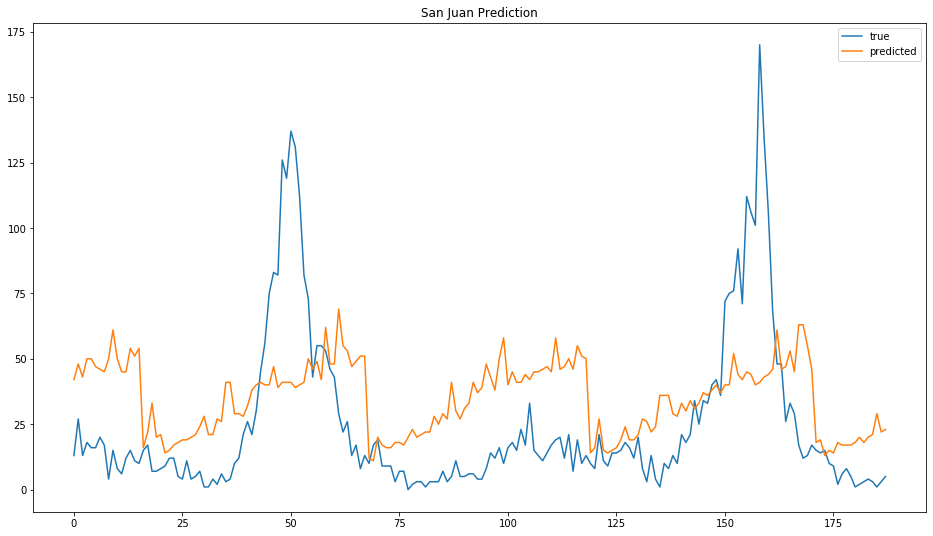

In [16]:

plt.plot(y_true, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title('San Juan Prediction')

In [17]:
X_train = train_iq.drop(labels=['total_cases'], axis=1)
y_train = train_iq['total_cases']
X_test = test_iq.drop(labels=['total_cases'], axis=1)
y_test = test_iq['total_cases']

In [18]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
scores = ["explained_variance" , "neg_mean_absolute_error" ,"neg_mean_squared_error" ,"r2"]
model = MLPRegressor(max_iter=10000)
parameters = {'hidden_layer_sizes': [(100, ), (20, 30), (13, 13, 13)]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, parameters, cv=TimeSeriesSplit(n_splits=5),
             scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        print()
    
    y_true, y_pred = y_test, clf.predict(X_test).astype(int)
    
    
    print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))
    print("-------------------------------------------------------")
    print()

# Tuning hyper-parameters for explained_variance

Best parameters set found on development set:

{'hidden_layer_sizes': (100,)}

Grid scores on development set:

-0.447 (+/-1.419) for {'hidden_layer_sizes': (100,)}

-1.137 (+/-2.483) for {'hidden_layer_sizes': (20, 30)}

-1.540 (+/-5.244) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 18.436170
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'hidden_layer_sizes': (20, 30)}

Grid scores on development set:

-19.953 (+/-52.667) for {'hidden_layer_sizes': (100,)}

-7.246 (+/-4.585) for {'hidden_layer_sizes': (20, 30)}

-8.543 (+/-4.562) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 21.430851
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'hidden_layer_sizes': (13, 13, 13)}

Gr

In [20]:

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13,13,13))
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 19.712766


Text(0.5, 1.0, 'Iquitos Prediction')

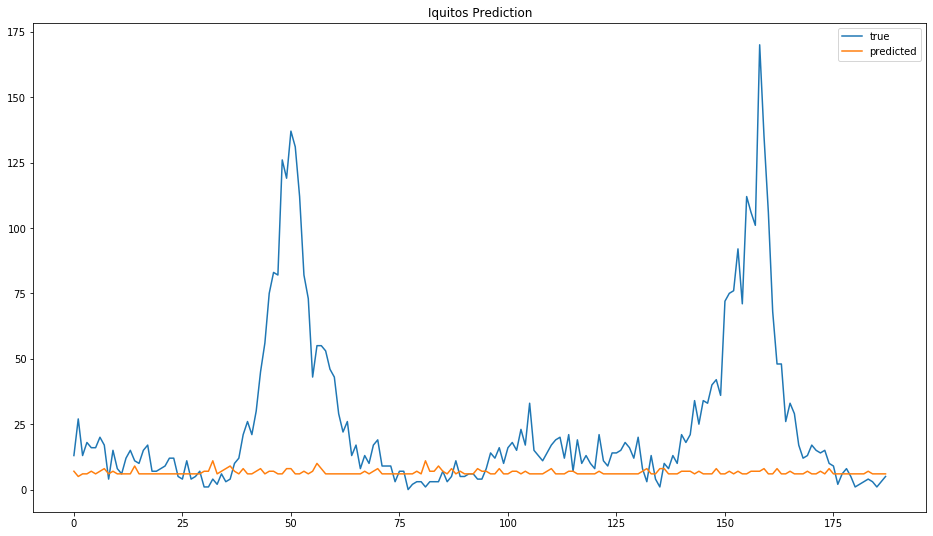

In [21]:
plt.plot(y_true, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title('Iquitos Prediction')

In [22]:
X_sj_test = pd.read_csv('X_sj_test.csv')
X_iq_test = pd.read_csv('X_iq_test.csv')

In [23]:
#San Juan
X_train = train_sj.append(test_sj, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_sj_test

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype(int)

sub_df_sj = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_sj.insert(0, 'city', 'sj')
sub_df_sj.insert(1, 'year', X_test['year'])
sub_df_sj.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_sj


,city,year,weekofyear,total_cases
0,sj,2008,18,20
1,sj,2008,19,26
2,sj,2008,20,20
3,sj,2008,21,22
4,sj,2008,22,26
5,sj,2008,23,30
6,sj,2008,24,26
7,sj,2008,25,28
8,sj,2008,26,29
9,sj,2008,27,28


In [24]:
#Iquitos

X_train = train_iq.append(test_iq, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_iq_test

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13,13,13))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype(int)

sub_df_iq = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_iq.insert(0, 'city', 'iq')
sub_df_iq.insert(1, 'year', X_test['year'])
sub_df_iq.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_iq

,city,year,weekofyear,total_cases
0,iq,2010,26,3
1,iq,2010,27,4
2,iq,2010,28,2
3,iq,2010,29,6
4,iq,2010,30,4
5,iq,2010,31,1
6,iq,2010,32,5
7,iq,2010,33,2
8,iq,2010,34,2
9,iq,2010,35,2
